Importing the Data and EDA

In [ ]:
#pip install imblearn

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, classification_report
#from shapely.geometry import Point, Polygon
#import geopandas as gpd

In [2]:
testing = pd.read_csv('data/Test data.csv')
training = pd.read_csv('data/Training data.csv')
target = pd.read_csv('data/Training data target.csv')

In [3]:
testing.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2/4/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other


In [4]:
training.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
target.head(1)

,id,status_group
0,69572,functional


Here I begin analyzing the columns in the dataset that I was assigned:

In [6]:
df= training[['basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   basin           59400 non-null  object
 1   subvillage      59029 non-null  object
 2   region          59400 non-null  object
 3   region_code     59400 non-null  int64 
 4   district_code   59400 non-null  int64 
 5   lga             59400 non-null  object
 6   ward            59400 non-null  object
 7   population      59400 non-null  int64 
 8   public_meeting  56066 non-null  object
 9   recorded_by     59400 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.5+ MB


<AxesSubplot:xlabel='basin', ylabel='count'>

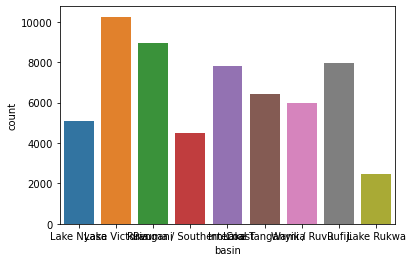

In [7]:
df['basin'].value_counts()
sns.countplot(x=df['basin'])

<AxesSubplot:xlabel='subvillage', ylabel='population'>

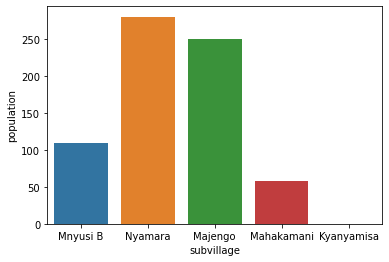

In [8]:
df['subvillage'].value_counts()
sns.barplot(x=df['subvillage'][:5], y=df['population'])

C:\Users\deaud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population', ylabel='region'>

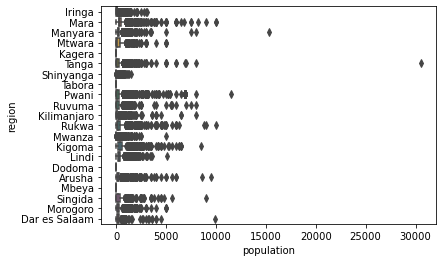

In [9]:
df['region'].value_counts()
sns.boxplot(df['population'], df['region'])

<AxesSubplot:xlabel='region_code', ylabel='count'>

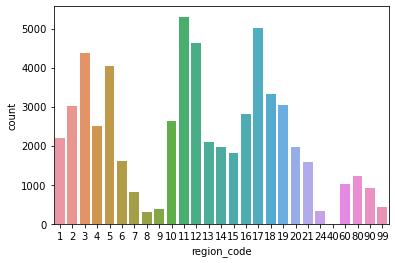

In [10]:
df['region_code'].value_counts()
sns.countplot(x=df['region_code'])

<AxesSubplot:xlabel='district_code', ylabel='count'>

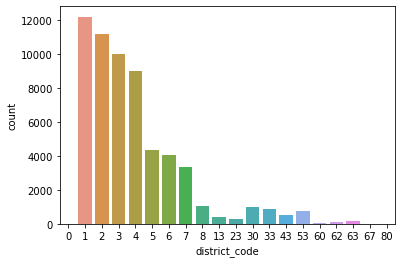

In [11]:
df['district_code'].value_counts()
sns.countplot(x=df['district_code'])

C:\Users\deaud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population', ylabel='lga'>

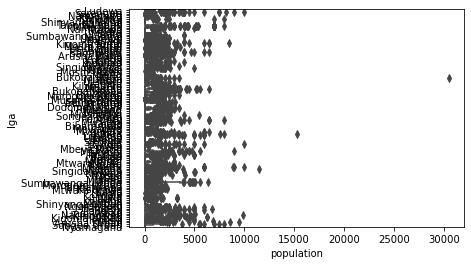

In [12]:
#df['lga'].value_counts()
sns.boxplot(df['population'], df['lga'])

In [13]:
df['ward'].value_counts()

Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Uchindile            1
Thawi                1
Uwanja wa Ndege      1
Izia                 1
Kinungu              1
Name: ward, Length: 2092, dtype: int64

In [95]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64

<AxesSubplot:xlabel='public_meeting', ylabel='count'>

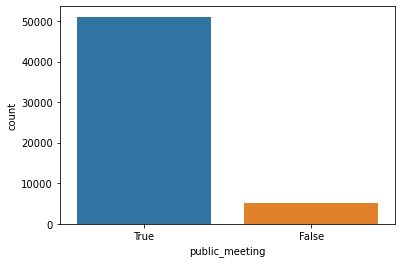

In [15]:
df['public_meeting'].value_counts()
sns.countplot(x=df['public_meeting'])

<AxesSubplot:xlabel='recorded_by', ylabel='count'>

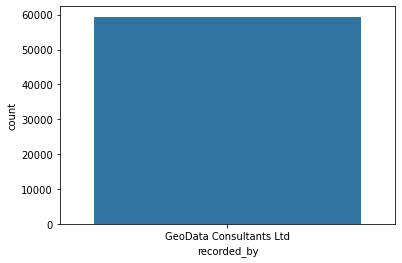

In [16]:
df['recorded_by'].value_counts()
sns.countplot(x=df['recorded_by'])

Now moving on to adding some visuals.

In [17]:
#sns.scatter(pd.concat([training, target], axis=1), y_vars=['status_group'])

Now on to splitting and cleaning the data for modeling.

In [186]:
train_clean = pd.read_csv('data/data_clean.csv')

In [187]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             59400 non-null  int64 
 1   funder                 55765 non-null  object
 2   gps_height             59400 non-null  int64 
 3   installer              55745 non-null  object
 4   wpt_name               59400 non-null  object
 5   basin                  59400 non-null  object
 6   region_code            59400 non-null  int64 
 7   district_code          59400 non-null  int64 
 8   population             59400 non-null  int64 
 9   public_meeting         56066 non-null  object
 10  permit                 56344 non-null  object
 11  construction_year      59400 non-null  int64 
 12  extraction_type_class  59400 non-null  object
 13  management             59400 non-null  object
 14  payment_type           59400 non-null  object
 15  quality_group      

In [172]:
##THANKS OLGERT!
train_clean['district_code']= train_clean['district_code'].astype(str)
train_clean['region_code']= train_clean['region_code'].astype(str)

In [173]:
##COPIED THIS CODE BLOCK: THANKS HATICE!
#Fill in median for nulls values
years = train_clean['construction_year'].replace(0, (train_clean['construction_year'].median()))

#Bin into decades 
def bin_ages(age_series: pd.Series) -> pd.Series:
    age_labels = [f"[{i}, {i+10})" for i in range(1960, 2013, 10)]

    age_bins = pd.IntervalIndex.from_tuples(
        [(i, i+10) for i in range(1960, 2013, 10)],
        closed="left"
    )

    ages_binned = pd.cut(
        age_series,
        age_bins,
        labels=age_labels,
        precision=0,
        include_lowest=True
    )
    ages_binned.sort_values(ascending=True, inplace=True)
    # Change the values from categorical to string to be able to plot them
    ages_binned = ages_binned.astype("str")

    return ages_binned

train_clean['construction_year_decade'] = bin_ages(years)

In [188]:
X = train_clean.drop(columns=['Unnamed: 0', 'status_group', 'construction_year'], axis= 1)
y = train_clean['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=500)

In [182]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   funder                 55765 non-null  object
 1   gps_height             59400 non-null  int64 
 2   installer              55745 non-null  object
 3   wpt_name               59400 non-null  object
 4   basin                  59400 non-null  object
 5   region_code            59400 non-null  int64 
 6   district_code          59400 non-null  int64 
 7   population             59400 non-null  int64 
 8   public_meeting         56066 non-null  object
 9   permit                 56344 non-null  object
 10  extraction_type_class  59400 non-null  object
 11  management             59400 non-null  object
 12  payment_type           59400 non-null  object
 13  quality_group          59400 non-null  object
 14  quantity               59400 non-null  object
 15  source             

In [159]:
X['funder'].value_counts().sort_values(ascending=False)[:5]

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Name: funder, dtype: int64

In [163]:
safe_values= X['funder'].value_counts().sort_values(ascending=False)[:5]
X['funder'] = X.loc[:, 'funder'].map(lambda x: 'other' if x not in safe_values else x)

In [165]:
X['funder'].value_counts()

other                     42277
Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Name: funder, dtype: int64

In [189]:
X.dtypes

funder                   object
gps_height                int64
installer                object
wpt_name                 object
basin                    object
region_code               int64
district_code             int64
population                int64
public_meeting           object
permit                   object
extraction_type_class    object
management               object
payment_type             object
quality_group            object
quantity                 object
source                   object
source_class             object
waterpoint_type          object
dtype: object

In [190]:
X['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [191]:
X['public_meeting'] = X['public_meeting'].map(lambda x: '1' if x == True else '0')

In [195]:
X.dtypes

funder                   object
gps_height                int64
installer                object
wpt_name                 object
basin                    object
region_code               int64
district_code             int64
population                int64
public_meeting           object
permit                   object
extraction_type_class    object
management               object
payment_type             object
quality_group            object
quantity                 object
source                   object
source_class             object
waterpoint_type          object
dtype: object

In [199]:
X["permit"].value_counts()

1    38852
0    17492
Name: permit, dtype: int64

In [198]:
X["permit"] = X["permit"].map({True : "1" , False  :"0"})

In [27]:
# Transformer requires Index type
categorical_columns= X.select_dtypes(include= 'object').columns
numeric_columns= X.select_dtypes(exclude= 'object').columns

In [28]:
categorical_columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'region_code',
       'district_code', 'public_meeting', 'permit', 'extraction_type_class',
       'management', 'payment_type', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type', 'construction_year_decade'],
      dtype='object')

In [29]:
numeric_columns

Index(['gps_height', 'population'], dtype='object')

In [30]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median", add_indicator=True)), ("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))])

#target_transformer = LabelEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, ['gps_height', 'population']),
        ("cat", categorical_transformer, ['funder', 'installer', 'wpt_name', 'basin', 'region_code',
       'district_code', 'public_meeting', 'permit', 'extraction_type_class',
       'management', 'payment_type', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type', 'construction_year_decade'])])

Baseline: Logistic Regression

In [68]:
logreg_model = Pipeline(steps=[('clean', preprocessor), ('logreg', LogisticRegression(random_state=500))])

logreg_model.fit(X_train, y_train)

logreg_model.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8167869167869168

In [69]:
logreg_hat = logreg_model.predict(X_test)

In [70]:
print(f"""
Our first model's accuracy on the test set is {round(accuracy_score(y_test, logreg_hat), 2)}. \n
Our first model's recall on the test set is {round(recall_score(y_test, logreg_hat, average='micro'), 2)} \n
Our first model's precision on the test set is {round(precision_score(y_test, logreg_hat, average='micro'), 2)} \n
Our first model's f1-score on the test is {round(f1_score(y_test, logreg_hat, average='micro'), 2)}.
""")


Our final model's accuracy on the test set is 0.76. 

Our final model's recall on the test set is 0.76 

Our final model's precision on the test set is 0.76 

Our final model's f1-score on the test is 0.76.



In [71]:
print(f"""
Our first model's accuracy on the test set is {round(accuracy_score(y_test, logreg_hat), 2)}. \n
Our first model's recall on the test set is {round(recall_score(y_test, logreg_hat, average='macro'), 2)} \n
Our first model's precision on the test set is {round(precision_score(y_test, logreg_hat, average='macro'), 2)} \n
Our first model's f1-score on the test is {round(f1_score(y_test, logreg_hat, average='macro'), 2)}.
""")


Our final model's accuracy on the test set is 0.76. 

Our final model's recall on the test set is 0.59 

Our final model's precision on the test set is 0.67 

Our final model's f1-score on the test is 0.61.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


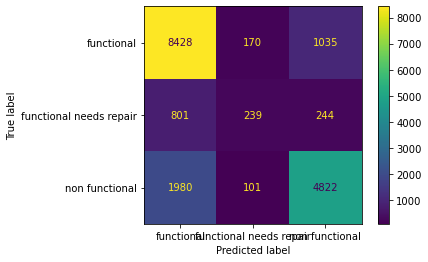

In [72]:
plot_confusion_matrix(logreg_model, X_test, y_test);

GridSearchCV

In [120]:
parameters = {'logreg__penalty': ['elasticnet'],
              'logreg__class_weight': ['balanced'],
              'logreg__solver': ['saga'],
              'logreg__C' : [0.01, 0.1, 0.5, 1.0],
              'logreg__l1_ratio': [1.0, 0.0, 0.5]}

gs = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise'
                )
            

In [126]:
parameters = {'logreg__solver': ['newton-cg', 'lbfgs','saga', 'sag']}

gs = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [127]:
## Time ran for me: 67m 46.1s
gs.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population']),
                                                                        ('cat',
            

In [136]:
print(gs.best_params_)
print(gs.cv_results_['mean_test_score'])

{'logreg__class_weight': None, 'logreg__solver': 'sag'}
[0.67890813 0.75962001]


In [132]:
parameters = {'logreg__solver': ['sag'],
              'logreg__class_weight': ['balanced', None]}

gs = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [133]:
gs.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population']),
                                                                        ('cat',
            

In [ ]:
print(gs.best_params_)
print(gs.cv_results_['mean_test_score'])

In [ ]:
parameters = {'logreg__solver': ['sag'],
              'logreg__class_weight': [None],
              }

gs = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [78]:
gs_model = Pipeline(steps=[('clean', preprocessor), ('logreg', LogisticRegression(penalty= 'l2'\
    , solver= 'newton-cg', class_weight= 'balanced', random_state=500))])

gs_model.fit(X_train, y_train)

gs_model.score(X_train, y_train)

0.843025493025493

In [96]:
gs_model.score(X_test, y_test)

0.7153759820426487

In [79]:
gs_log_hat = gs_model.predict(X_test)

In [80]:
print(f"""
Our gridsearched model's accuracy on the test set is {round(accuracy_score(y_test, gs_log_hat), 2)}. \n
Our gridsearched model's recall on the test set is {round(recall_score(y_test, gs_log_hat, average='macro'), 2)} \n
Our gridsearched model's precision on the test set is {round(precision_score(y_test, gs_log_hat, average='macro'), 2)} \n
Our gridsearched model's f1-score on the test is {round(f1_score(y_test, gs_log_hat, average='macro'), 2)}.
""")


Our final model's accuracy on the test set is 0.72. 

Our final model's recall on the test set is 0.66 

Our final model's precision on the test set is 0.61 

Our final model's f1-score on the test is 0.62.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


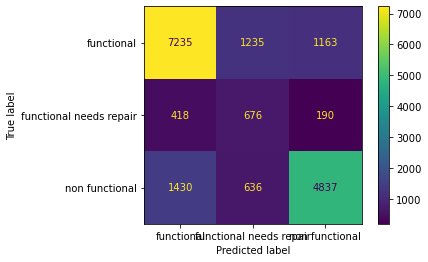

In [81]:
plot_confusion_matrix(gs_model, X_test, y_test);

SMOTE

In [87]:
smote_pipe = ImPipeline(steps=[('clean', preprocessor),
                             ('sm', SMOTE()),
                            ('logreg', LogisticRegression(penalty= 'l2', solver= 'newton-cg', class_weight= 'balanced', random_state=500))])

In [88]:
smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('clean',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'population']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   O

In [89]:
smote_pipe.score(X_train, y_train)

0.8778018278018278

In [97]:
smote_pipe.score(X_test, y_test)

0.7252525252525253

In [91]:
smote_hat = smote_pipe.predict(X_test)

In [93]:
print(f"""
Our SMOTE model's accuracy on the test set is {round(accuracy_score(y_test, smote_hat), 2)}. \n
Our SMOTE model's recall on the test set is {round(recall_score(y_test, smote_hat, average='macro'), 2)} \n
Our SMOTE model's precision on the test set is {round(precision_score(y_test, smote_hat, average='macro'), 2)} \n
Our SMOTE model's f1-score on the test is {round(f1_score(y_test, smote_hat, average='macro'), 2)}.
""")


Our SMOTE model's accuracy on the test set is 0.73. 

Our SMOTE model's recall on the test set is 0.65 

Our SMOTE model's precision on the test set is 0.62 

Our SMOTE model's f1-score on the test is 0.63.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


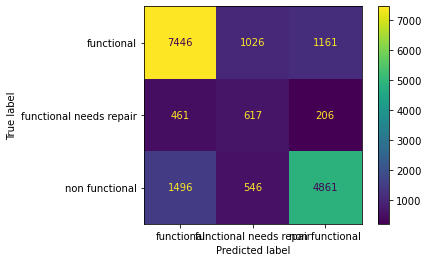

In [94]:
plot_confusion_matrix(smote_pipe, X_test, y_test);